In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from celluloid import Camera

### Black and white colors of pixels

In [2]:
def evolution_binar(c, iterations = 100, x_size = 1000, y_size = 800):
    x_values = np.linspace(-1.5, 1.5, x_size)
    y_values = np.linspace(-1.2, 1.2, y_size)
    
    img = np.zeros(( y_values.shape[0], x_values.shape[0]))
    
    
    for x in x_values:
        for y in y_values:
            z = x + y*1j 

            n = 0
            while np.absolute(z) < 2 and n < iterations:
                z = z**2 + c
                n += 1

            if n == iterations:
                img[np.where(y_values == y)[0][0]][np.where(x_values == x)[0][0]] = 255
            
            
    plt.figure(figsize=(10, 8))
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.title('Julia Set binar')
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.show()

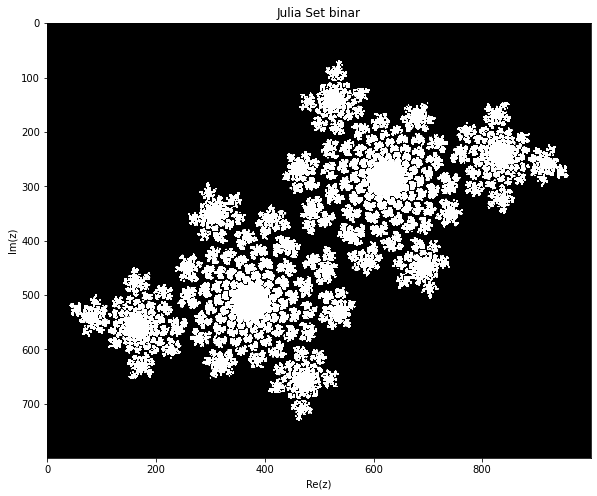

In [3]:
evolution_binar(-0.4 + 0.6j)

### Different colors for bifurcation points

In [4]:
def evolution_color(c, iterations = 100, x_size = 1000, y_size = 800):

    x_values = np.linspace(-1.5, 1.5, x_size)
    y_values = np.linspace(-1.2, 1.2, y_size)

    img = np.zeros(( y_values.shape[0], x_values.shape[0]))

    #colors distr
    colors = np.linspace(1, 255, iterations+1)
    colors = colors.astype(int)
    n_for_colors = np.array(list(range(0, iterations+1)))

    for x in x_values:
        for y in y_values:
            z = x + y*1j 

            n = 0
            while np.absolute(z) < 2 and n < iterations:
                z = z**2 + c
                n += 1

            img[np.where(y_values == y)[0][0]][np.where(x_values == x)[0][0]] = colors[np.where(n_for_colors == n)[0][0]]


    plt.figure(figsize=(10, 8))
    plt.imshow(img, cmap='cividis')
    plt.title('Julia Set color')
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.show()

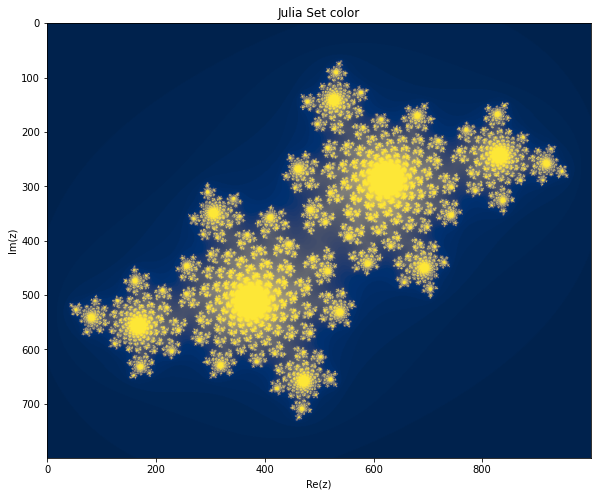

In [5]:
evolution_color(-0.4 + 0.6j)

### Generate figure of Julia set (c = 1-r) where r is the golden ratio

In [6]:
from scipy import constants
# from skimage.color import rgb2bgr
from skimage.color import hsv2rgb
import cv2

In [7]:
def golden_ration(iterations = 100, x_size = 500, y_size = 400):
    r = constants.golden
    c = 1 - r

    x_values = np.linspace(-1.5, 1.5, x_size)
    y_values = np.linspace(-1.2, 1.2, y_size)

    img = np.zeros(( y_values.shape[0], x_values.shape[0], 3))

    #colors distr
    colors = np.linspace(0, 1, 30)
#     colors_2 = np.linspace(0.7, 0., 30)
    
    n_for_colors = np.array(list(range(0, 30)))

    for x in x_values:
        for y in y_values:
            z = x + y*1j 

            n = 0
            while np.absolute(z) < 2 and n < iterations:
                z = z**2 + c
                n += 1

            if n == 100:
                img[:,:,0][np.where(y_values == y)[0][0]][np.where(x_values == x)[0][0]] = 75
                img[:,:,1][np.where(y_values == y)[0][0]][np.where(x_values == x)[0][0]] = .4
                img[:,:,2][np.where(y_values == y)[0][0]][np.where(x_values == x)[0][0]] = 1

            else:
                img[:,:,0][np.where(y_values == y)[0][0]][np.where(x_values == x)[0][0]] = 0
#                 img[:,:,1][np.where(y_values == y)[0][0]][np.where(x_values == x)[0][0]] = 1
                img[:,:,1][np.where(y_values == y)[0][0]][np.where(x_values == x)[0][0]] = colors[np.where(n_for_colors == n)[0][0]]
#                 img[:,:,2][np.where(y_values == y)[0][0]][np.where(x_values == x)[0][0]] = colors_2[np.where(n_for_colors == n)[0][0]]
                img[:,:,2][np.where(y_values == y)[0][0]][np.where(x_values == x)[0][0]] = 1

    img = hsv2rgb(img)

    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.title('Julia golden ration')
    plt.xlabel("Re(z0)")
    plt.ylabel("Im(z0)")
    plt.show()


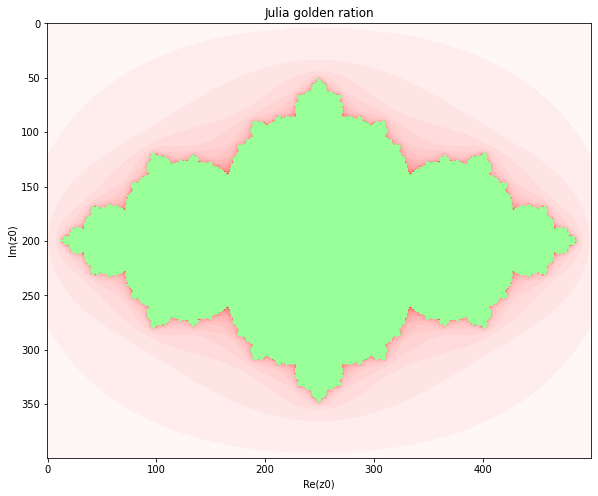

In [8]:
golden_ration()

### Plot figures for c=exp(ia), a = range(0,2pi) & write down axes like in subtask 3, create animation of these figures slowly changing the a

In [9]:
def figures():
    c_range = np.exp(1j * 2 * np.pi * np.linspace(0, 1, 100))

    gif = []

    for c in c_range:

        iterations = 100
        x_size = 500
        y_size = 400

        x_values = np.linspace(-1.5, 1.5, x_size)
        y_values = np.linspace(-1.2, 1.2, y_size)

        img = np.zeros(( y_values.shape[0], x_values.shape[0]))

        #colors distr
        colors = np.linspace(1, 255, iterations+1)
        colors = colors.astype(int)
        n_for_colors = np.array(list(range(0, iterations+1)))

        for x in x_values:
            for y in y_values:
                z = x + y*1j 

                n = 0
                while np.absolute(z) < 2 and n < iterations:
                    z = z**2 + c
                    n += 1
    
                img[np.where(y_values == y)[0][0]][np.where(x_values == x)[0][0]] = colors[np.where(n_for_colors == n)[0][0]]
        gif.append(img)
        
    return gif

In [10]:
figures()

KeyboardInterrupt: 

In [12]:
def save_gif(func):
    
    gif = func()

    fig = plt.figure(figsize=(10, 8))
    camera = Camera(fig)
    ax = fig.add_subplot(1,1,1)

    n = np.linspace(0, 1, 100)

    for i in range(len(gif)):


        ax.imshow(gif[i])

        plt.title(f"Julia with c = exp(ia), a = range(0,2pi)")
        plt.xlabel("Re(z0)")
        plt.ylabel("Im(z0)")

        camera.snap()


    animation = camera.animate()
    animation.save('Nazarova_Julia_set.gif', writer = 'pillow', fps = 10)
    print("You saved the gif")

In [14]:
# save_gif(figures)